In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install PyWavelets==1.4.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 42.6 MB/s eta 0:00:00


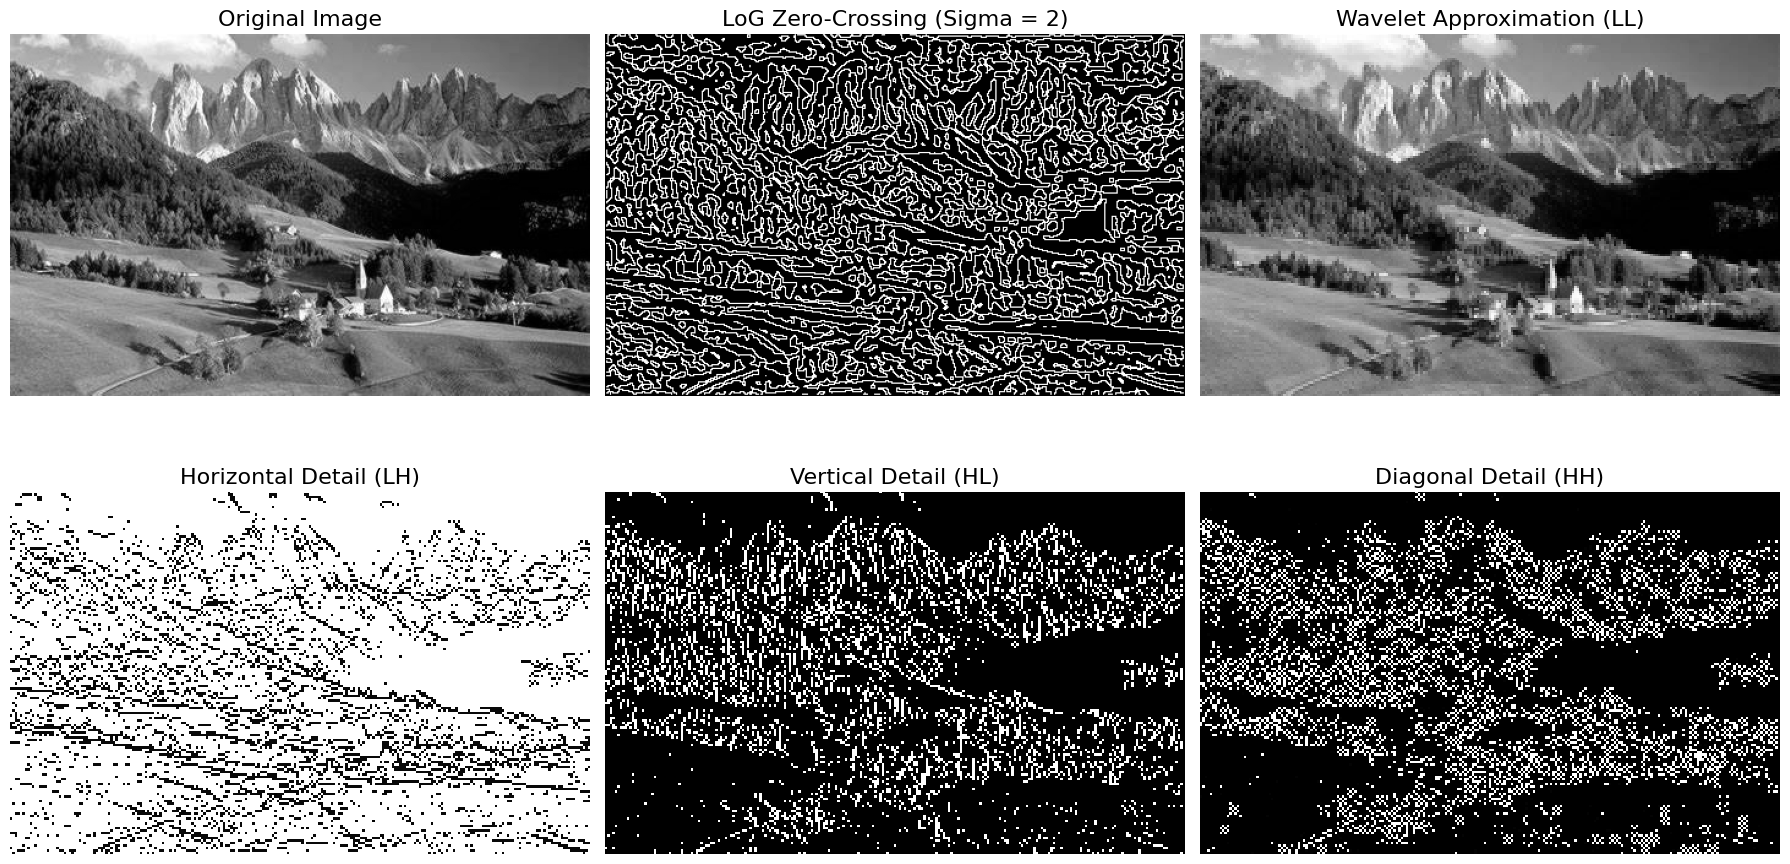

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
import pywt
import imageio.v3 as imageio

def any_neighbor_zero(img, i, j):
    """ Mengecek apakah ada piksel tetangga dengan nilai nol. """
    for k in range(-1, 2):
        for l in range(-1, 2):
            if k == 0 and l == 0:
                continue
            if img[i+k, j+l] == 0:
                return True
    return False

def zero_crossing(img):
    """ Mendeteksi zero-crossing dalam gambar hasil filter LoG. """
    img[img > 0] = 1
    img[img < 0] = 0

    out_img = np.zeros(img.shape)
    for i in range(1, img.shape[0]-1):
        for j in range(1, img.shape[1]-1):
            if img[i, j] > 0 and any_neighbor_zero(img, i, j):
                out_img[i, j] = 255

    return out_img.astype(np.uint8)

original = rgb2gray(imageio.imread('/content/drive/MyDrive/images/pegunungan.jpg'))

sigma = 2
log_result = ndimage.gaussian_laplace(original, sigma=sigma)
log_edges = zero_crossing(log_result)

coeffs2 = pywt.dwt2(original, 'haar')
LL, (LH, HL, HH) = coeffs2

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

axes[0, 0].imshow(original, cmap='gray')
axes[0, 0].set_title("Original Image", fontsize=16)
axes[0, 0].axis("off")

axes[0, 1].imshow(log_edges, cmap='gray')
axes[0, 1].set_title(f"LoG Zero-Crossing (Sigma = {sigma})", fontsize=16)
axes[0, 1].axis("off")

axes[0, 2].imshow(abs(LL), cmap='gray', interpolation="nearest")
axes[0, 2].set_title("Wavelet Approximation (LL)", fontsize=16)
axes[0, 2].axis("off")

LH[LH > threshold_otsu(LH)] = 1
LH[LH <= threshold_otsu(LH)] = 0
axes[1, 0].imshow(LH, cmap='gray', interpolation="nearest")
axes[1, 0].set_title("Horizontal Detail (LH)", fontsize=16)
axes[1, 0].axis("off")

HL[HL > threshold_otsu(HL)] = 1
HL[HL <= threshold_otsu(HL)] = 0
axes[1, 1].imshow(HL, cmap='gray', interpolation="nearest")
axes[1, 1].set_title("Vertical Detail (HL)", fontsize=16)
axes[1, 1].axis("off")

HH[HH > threshold_otsu(HH)] = 1
HH[HH <= threshold_otsu(HH)] = 0
axes[1, 2].imshow(HH, cmap='gray', interpolation="nearest")
axes[1, 2].set_title("Diagonal Detail (HH)", fontsize=16)
axes[1, 2].axis("off")

plt.tight_layout()
plt.show()
